In [1]:
from modules.setup import *
from modules.utils import *
from modules.MetaNorm3D import *
from modules.MetaAlign3D import *
from modules.MetaImpute3D import *
from modules.MetaInterp3D import *
from modules.MetaAtlas3D import *
from modules.visualize import *
from modules.evaluate import *

In [2]:
group = 'wt'
omic = 'lipid'

In [3]:
# input data path
data_file_path = f'./data/3d_brain_{group}_pbp_{omic}_preprocessed.csv'
shell_file_path = f'./data/shell.csv' # shell is the off-tissue matrix, optional

# Load data

In [4]:
shell = pd.read_csv(shell_file_path,index_col=0) # optional

In [5]:
df = pd.read_csv(data_file_path,index_col=0,usecols=range(31)) # load first 30 columns to save memory for demo

In [6]:
df = remove_shell(df,shell) # remove shell from tissue, optional

In [7]:
df, deleted_compound = delete_low_prevalence_compound(df, 0.1, first_feature='LPA.18.1.')

In [8]:
deleted_compound

[]

# Preview

## check orientation

100%|██████████| 153/153 [00:24<00:00,  6.22it/s]


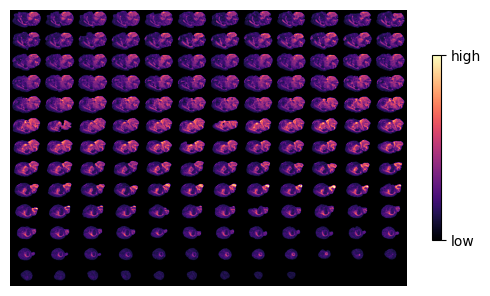

In [9]:
preview_matrix = create_compound_matrix(df, compound='LPA.18.1.',reverse=True)
display_montage(preview_matrix,grayscale=False,cmap=new_cmap1)

In [10]:
# flip in the left/right direction
df = flip_axis(df,flipud=True)

100%|██████████| 153/153 [00:24<00:00,  6.33it/s]


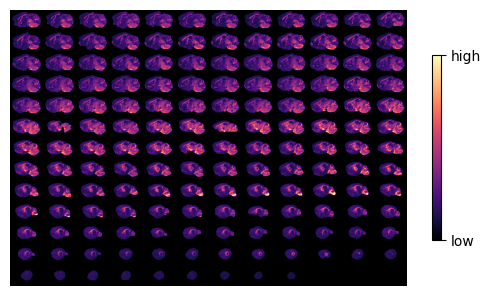

In [11]:
preview_matrix = create_compound_matrix(df, compound='LPA.18.1.',reverse=True)
display_montage(preview_matrix,grayscale=False,cmap=new_cmap1)

## remove inferior tissue

In [12]:
# delete inferior sections
inferior_tissues_id = [62,67,116]

In [13]:
df = delete_inferior_tissues(df,inferior_tissues_id,first_feature='LPA.18.1.',reverse=True)

100%|██████████| 153/153 [00:24<00:00,  6.31it/s]


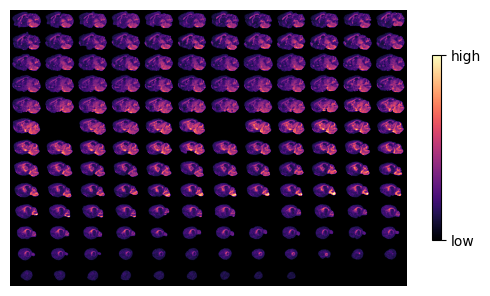

In [14]:
preview_matrix = create_compound_matrix(df, compound='LPA.18.1.',reverse=True)
display_montage(preview_matrix,grayscale=False,cmap=new_cmap1)

# MetaNorm3D

In [15]:
# normalization
meta_norm = MetaNorm3D(df, first_feature='LPA.18.1.')

In [16]:
# totalsum normalization
data = meta_norm.totalsum_norm()

100%|██████████| 153/153 [00:24<00:00,  6.30it/s]


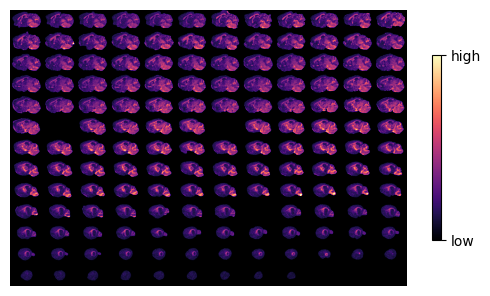

In [17]:
preview_matrix = create_compound_matrix(data, compound='LPA.18.1.',reverse=True)
display_montage(preview_matrix,grayscale=False,cmap=new_cmap1)

In [18]:
# section normalization
data = meta_norm.section_norm()

100%|██████████| 153/153 [00:24<00:00,  6.30it/s]


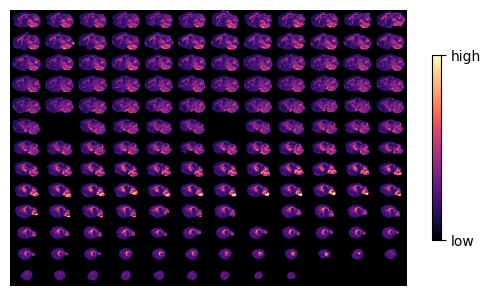

In [19]:
preview_matrix = create_compound_matrix(data, compound='LPA.18.1.',reverse=True)
display_montage(preview_matrix,grayscale=False,cmap=new_cmap1)

# MetaAlign3D

In [20]:
compound = 'LPA.18.1.'

In [21]:
meta_align = MetaAlign3D(group,data,compound,first_feature='LPA.18.1.', reverse=True)

Warp matrix exists. Using existing warp matrix to do alignment.


## Manual slices fitting

In [22]:
# manual slices fitting and create compound matrix
compound_matrix = meta_align.create_compound_matrix()

100%|██████████| 153/153 [00:24<00:00,  6.30it/s]


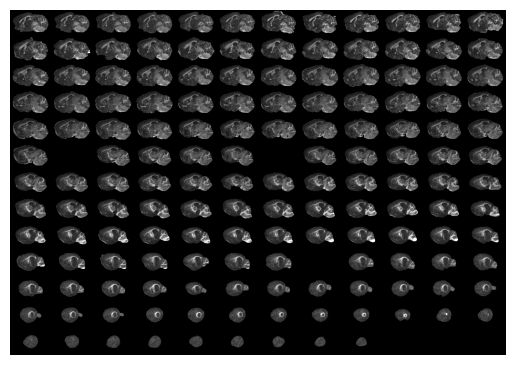

In [23]:
display_montage(compound_matrix,grayscale=True)

In [ ]:
display_animation(compound_matrix,grayscale=False,cmap=new_cmap1)

## Sequential Alignment

In [24]:
aligned_matrix = meta_align.seq_align()

100%|██████████| 152/152 [00:00<00:00, 186.62it/s]


In [ ]:
display_animation(aligned_matrix,grayscale=False,cmap=new_cmap1)

# MetaImpute3D

In [25]:
meta_impute = MetaImpute3D(aligned_matrix,radius=1)

In [26]:
imputed_matrix = meta_impute.seq_impute()

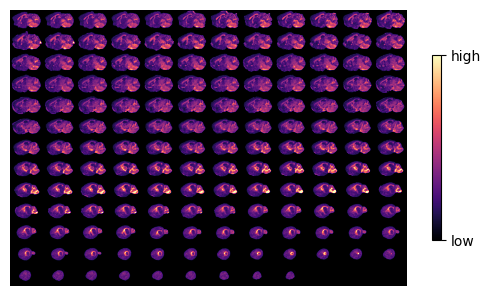

In [27]:
display_montage(imputed_matrix,grayscale=False,cmap=new_cmap1)

In [ ]:
display_animation(imputed_matrix,grayscale=False,cmap=new_cmap1)

# MetaInterp3D

In [28]:
# add 2 more slices 
meta_interp = MetaInterp3D(imputed_matrix,2)

In [29]:
interpolated_matrix = meta_interp.interp()

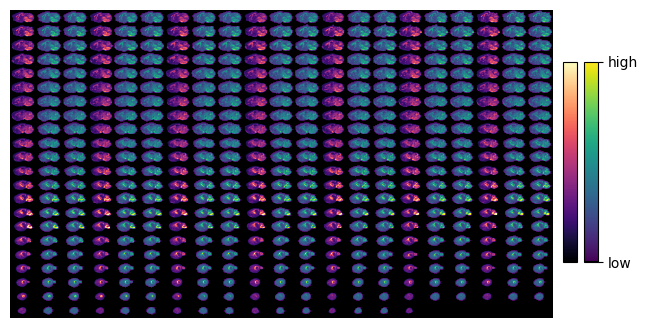

In [30]:
display_interp_montage(interpolated_matrix,new_cmap1,new_cmap2,insert=2)

# MetaAtlas3D

In [41]:
meta_atlas = MetaAtlas3D(interpolated_matrix,resolution=50,thickness=10,gap=50,insert=2)
nii_img = meta_atlas.create_nii()

In [42]:
if not os.path.exists('./output/3D/'):
    os.makedirs('./output/3D/')
nib.save(nii_img, f'./output/3D/{compound}.nii.gz')